### Q5

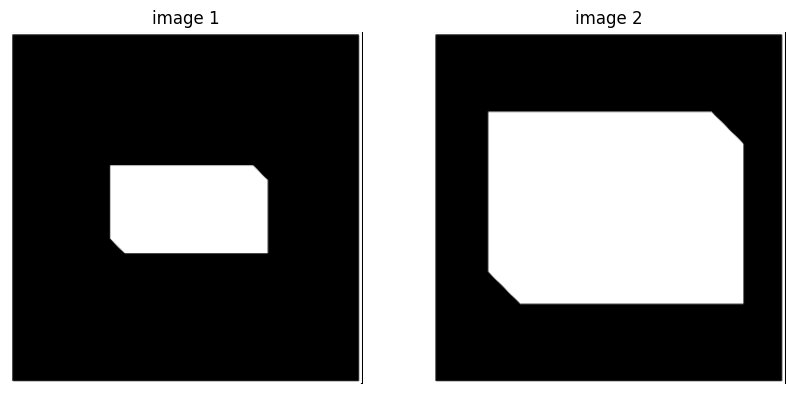

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('./img/Copy of Picture1.png')
img2 = cv2.imread('./img/Copy of Picture2.png')
RGB_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
RGB_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(RGB_img1), plt.axis("off"), plt.title("image 1")
plt.subplot(122), plt.imshow(RGB_img2), plt.axis("off"), plt.title("image 2")

plt.show()

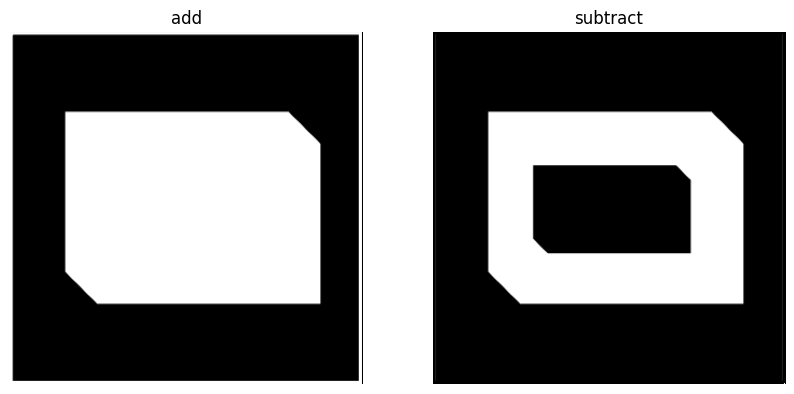

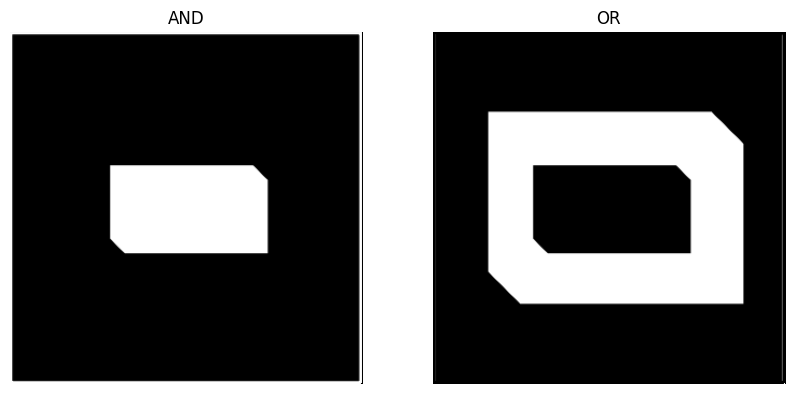

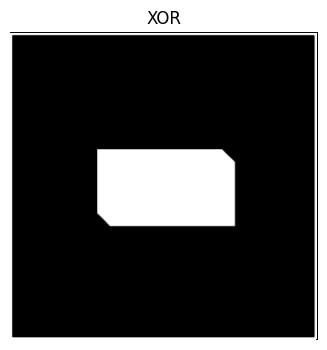

In [2]:
# 덧셈
add_img = cv2.add(img1, img2)

# 뺄셈
subtract_img = np.zeros_like(RGB_img1)
R_img1,G_img1,B_img1=cv2.split(RGB_img1)
R_img2,G_img2,B_img2=cv2.split(RGB_img2)

# 출력 array 생성하고 0으로 초기화, unsigned byte (0~255)로 설정
R_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
G_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
B_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)

#for문을 돌며 픽셀 빼기 연산 하기
for h in range(RGB_img1.shape[0]):
  for w in range(RGB_img1.shape[1]):
    R_plus[h,w] = np.abs(np.int32(R_img1[h,w]) - np.int32(R_img2[h,w])) 
    G_plus[h,w] = np.abs(np.int32(G_img1[h,w]) - np.int32(G_img2[h,w])) 
    B_plus[h,w] = np.abs(np.int32(B_img1[h,w]) - np.int32(B_img2[h,w])) 

subtract_img[:,:,0]=R_plus
subtract_img[:,:,1]=G_plus
subtract_img[:,:,2]=B_plus

def saturation(value): #saturation함수로 정의하기
    if(value>255):
       value = 255;
    return value

# AND 연산
and_img = np.zeros_like(RGB_img1)
for h in range(RGB_img1.shape[0]):
  for w in range(RGB_img1.shape[1]):
    R_plus[h,w] = saturation(np.int32(R_img1[h,w]) & np.int32(R_img2[h,w])) 
    G_plus[h,w] = saturation(np.int32(G_img1[h,w]) & np.int32(G_img2[h,w])) 
    B_plus[h,w] = saturation(np.int32(B_img1[h,w]) & np.int32(B_img2[h,w]))

and_img[:,:,0]=R_plus
and_img[:,:,1]=G_plus
and_img[:,:,2]=B_plus

# OR 연산
or_img = np.zeros_like(RGB_img1)
for h in range(RGB_img1.shape[0]):
  for w in range(RGB_img1.shape[1]):
    R_plus[h,w] = saturation(np.int32(R_img1[h,w]) | np.int32(R_img2[h,w])) 
    G_plus[h,w] = saturation(np.int32(G_img1[h,w]) | np.int32(G_img2[h,w])) 
    B_plus[h,w] = saturation(np.int32(B_img1[h,w]) | np.int32(B_img2[h,w]))

or_img[:,:,0]=R_plus
or_img[:,:,1]=G_plus
or_img[:,:,2]=B_plus

# XOR 연산
xor_img = np.zeros_like(RGB_img1)
for h in range(RGB_img1.shape[0]):
  for w in range(RGB_img1.shape[1]):
    R_plus[h,w] = saturation(np.int32(R_img1[h,w]) ^ np.int32(R_img2[h,w])) 
    G_plus[h,w] = saturation(np.int32(G_img1[h,w]) ^ np.int32(G_img2[h,w])) 
    B_plus[h,w] = saturation(np.int32(B_img1[h,w]) ^ np.int32(B_img2[h,w]))

or_img[:,:,0]=R_plus
or_img[:,:,1]=G_plus
or_img[:,:,2]=B_plus

plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(add_img), plt.axis("off"), plt.title("add")
plt.subplot(122), plt.imshow(subtract_img), plt.axis("off"), plt.title("subtract")
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(and_img), plt.axis("off"), plt.title("AND")
plt.subplot(122), plt.imshow(or_img), plt.axis("off"), plt.title("OR")
plt.show()

plt.figure(figsize=(8,4))
plt.imshow(and_img), plt.axis("off"), plt.title("XOR")
plt.show()


